In [106]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")


In [107]:
df = pd.read_excel(r"Ch3.ClevelandData.xlsx")

In [108]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


In [109]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [110]:
#Shape of the Dataset
print("Numbers of Rows :" ,df.shape[0])
print("Numbers of Columns :" ,df.shape[1])

Numbers of Rows : 303
Numbers of Columns : 14


In [111]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'hal', 'HeartDisease'],
      dtype='object')

In [112]:
df.dtypes

age               int64
sex               int64
cp                int64
trestbps          int64
chol              int64
fbs               int64
restecg           int64
thalach           int64
exang             int64
oldpeak         float64
slope             int64
ca               object
hal              object
HeartDisease      int64
dtype: object

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   trestbps      303 non-null    int64  
 4   chol          303 non-null    int64  
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hal           303 non-null    object 
 13  HeartDisease  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [114]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             0
HeartDisease    0
dtype: int64

In [115]:
df.duplicated().sum()

0

In [116]:
df['ca']= df['ca'].replace("?",np.NaN)

In [117]:

# Replace NaN with 0 in the 'ca' column
df['ca'] = df['ca'].fillna(0)

# Convert the 'ca' column to np.float64
df['ca'] = df['ca'].astype(np.float64)

In [118]:
df['hal'] = pd.to_numeric(df['hal'], errors='coerce')


In [119]:
df['hal'] = df['hal'].astype(np.float64)


In [120]:
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hal             2
HeartDisease    0
dtype: int64

In [121]:
df.dropna(axis=0,inplace=True)

In [122]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,54.451827,0.681063,3.156146,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.667774,4.734219,0.458472
std,9.067258,0.466841,0.962048,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.935908,1.939706,0.499102
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [123]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal,HeartDisease
age,1.000000,-0.098138,0.104994,0.284734,0.208287,0.121670,0.149037,-0.395982,0.092985,0.203604,0.162228,0.364981,0.127389,0.224394
sex,-0.098138,1.000000,0.007348,-0.065284,-0.202126,0.041025,0.029016,-0.057065,0.140802,0.098482,0.031571,0.084732,0.380936,0.272006
cp,0.104994,0.007348,1.000000,-0.035632,0.074626,-0.047687,0.071281,-0.337823,0.381624,0.202431,0.150179,0.235508,0.265246,0.412722
trestbps,0.284734,-0.065284,-0.035632,1.000000,0.129371,0.178498,0.147089,-0.046402,0.065564,0.188801,0.117437,0.096713,0.133554,0.151471
chol,0.208287,-0.202126,0.074626,0.129371,1.000000,0.015762,0.171185,-0.005690,0.064250,0.044836,-0.004228,0.120782,0.014214,0.086762
fbs,0.121670,0.041025,-0.047687,0.178498,0.015762,1.000000,0.079892,-0.012297,0.013534,0.004855,0.054079,0.147124,0.071358,0.015613
restecg,0.149037,0.029016,0.071281,0.147089,0.171185,0.079892,1.000000,-0.077950,0.092626,0.117580,0.140144,0.132462,0.024531,0.177049
thalach,-0.395982,-0.057065,-0.337823,-0.046402,-0.005690,-0.012297,-0.077950,1.000000,-0.386043,-0.349391,-0.393527,-0.270133,-0.279631,-0.425870
exang,0.092985,0.140802,0.381624,0.065564,0.064250,0.013534,0.092626,-0.386043,1.000000,0.287926,0.254076,0.148407,0.329680,0.427860
oldpeak,0.203604,0.098482,0.202431,0.188801,0.044836,0.004855,0.117580,-0.349391,0.287926,1.000000,0.576795,0.299771,0.341004,0.423894


EXPLORATORY DATA ANALYSIS

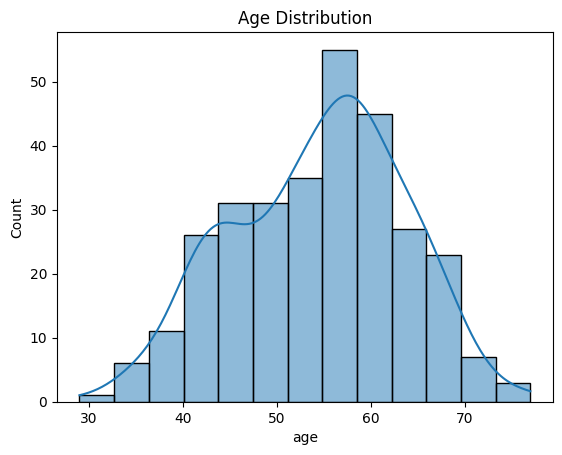

In [124]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

the highest count around the age of 50. 


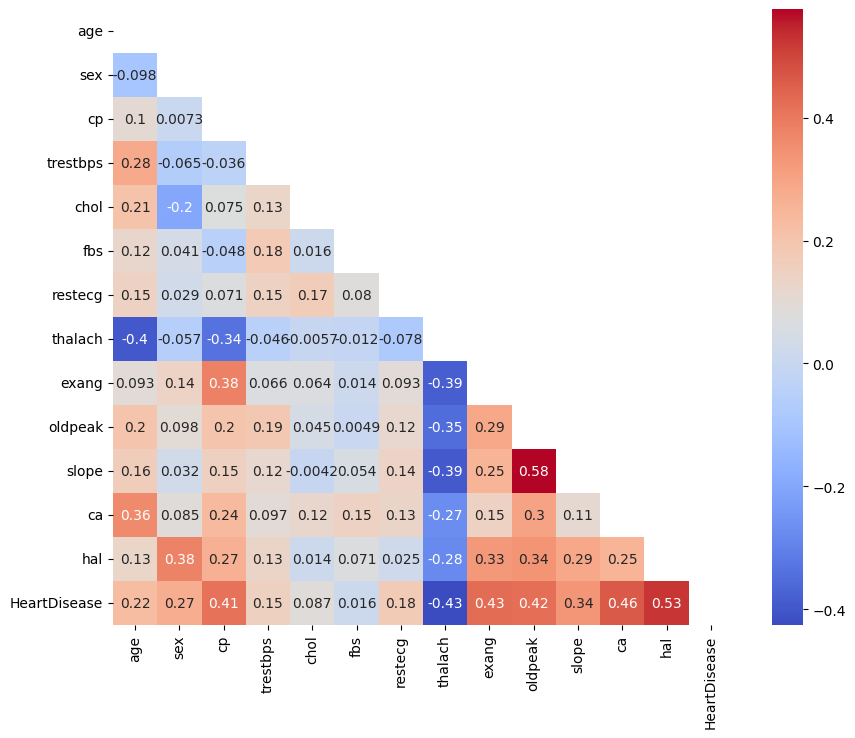

In [125]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm')
plt.show()


From the heatmap, we can observe that:

The variable 'thalach' (possibly maximum heart rate achieved) has a moderately strong negative correlation with 'age', 'exang' (exercise-induced angina), and 'oldpeak' (ST depression induced by exercise relative to rest).

'ca' (number of major vessels colored by fluoroscopy) and 'oldpeak' have a relatively strong positive correlation with the variable 'HeartDisease'.

'cp' (chest pain type) has a moderate positive correlation with 'thalach' and a negative correlation with 'exang'.

'sex' has a moderate positive correlation with 'HeartDisease'.

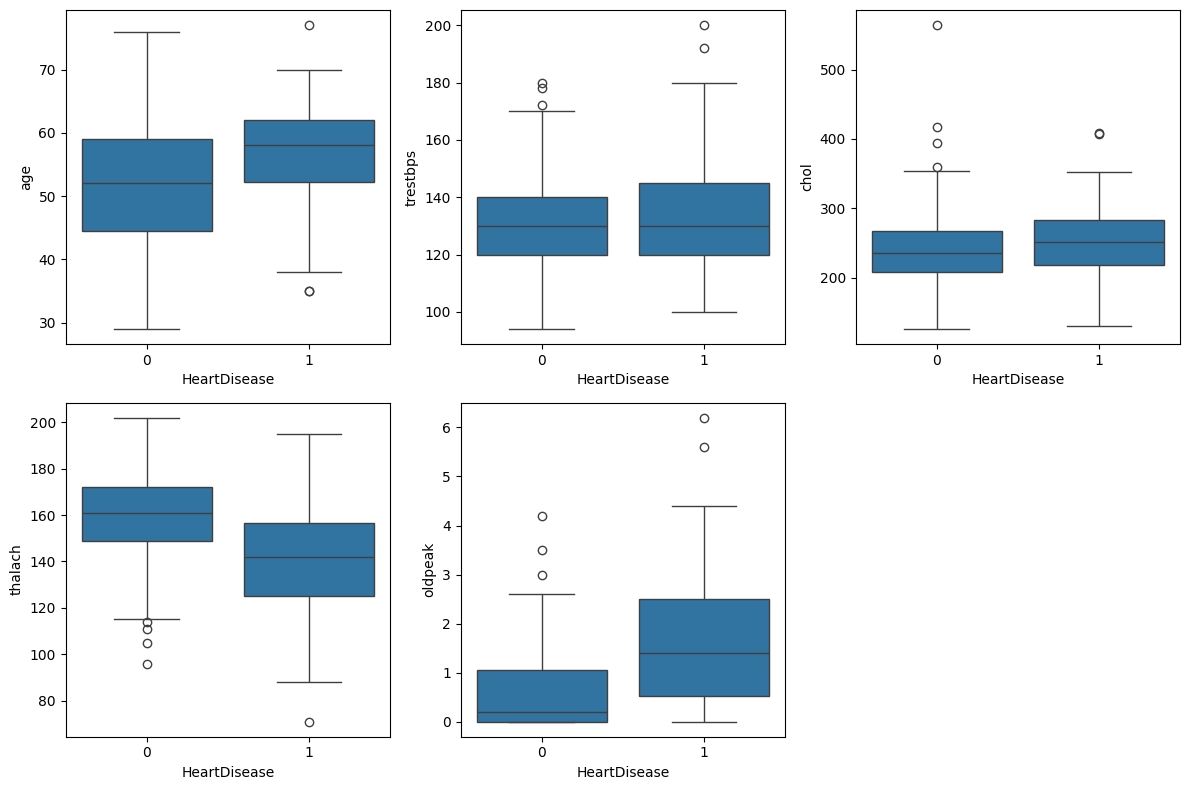

In [126]:

# Outliers
numeric_features = ['age', 'trestbps', 'chol', 'thalach','oldpeak']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='HeartDisease', y=feature, data=df)

plt.tight_layout()
plt.show()

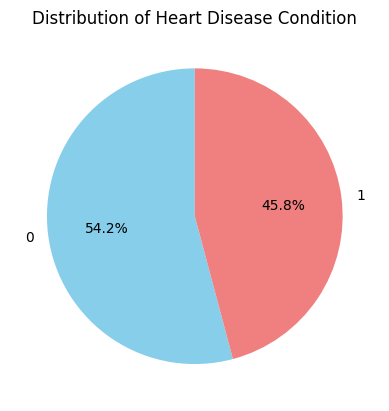

In [127]:
# Percentage distribution of heart disease condition
condition_counts = df['HeartDisease'].value_counts()


plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Heart Disease Condition')
plt.show()

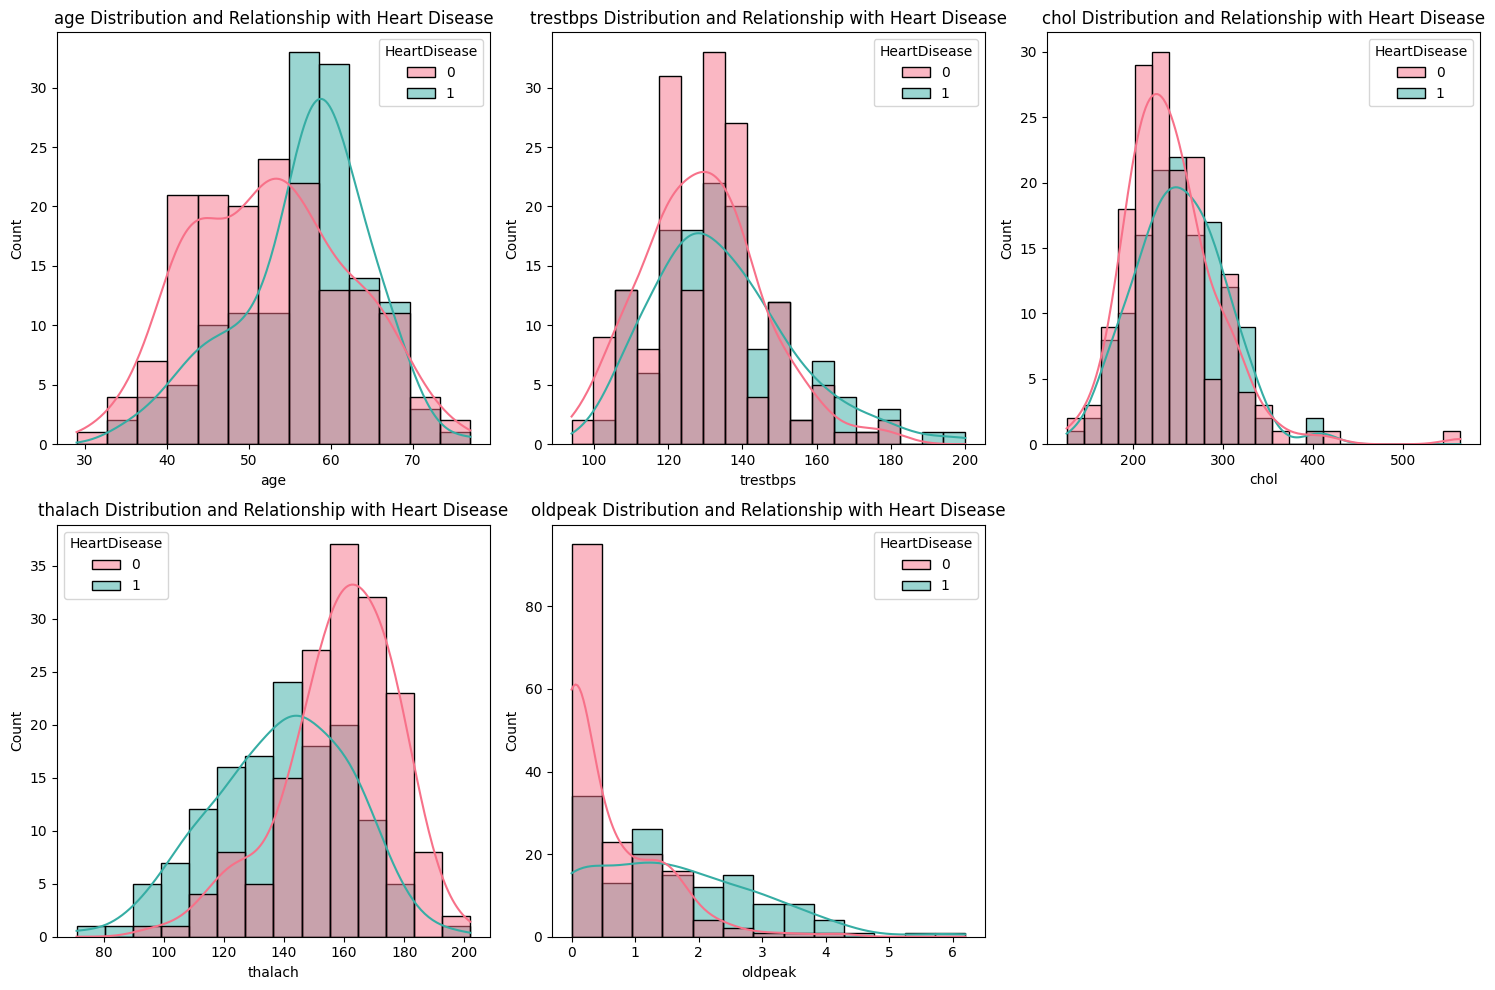

In [128]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 3, i) 
    sns.histplot(data=df, x=feature, hue='HeartDisease', kde=True, palette='husl')
    plt.title(f'{feature} Distribution and Relationship with Heart Disease')

plt.tight_layout()
plt.show()

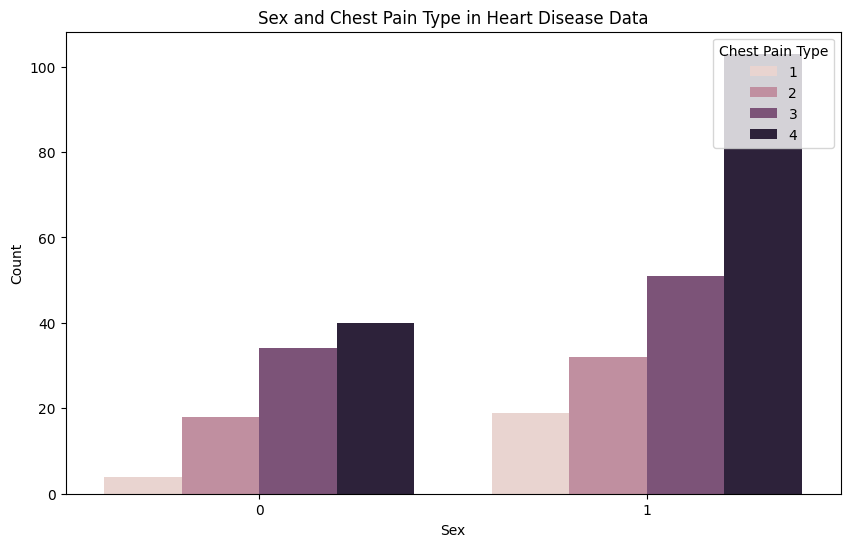

In [129]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='cp', data=df)

plt.title('Sex and Chest Pain Type in Heart Disease Data')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right')

plt.show()

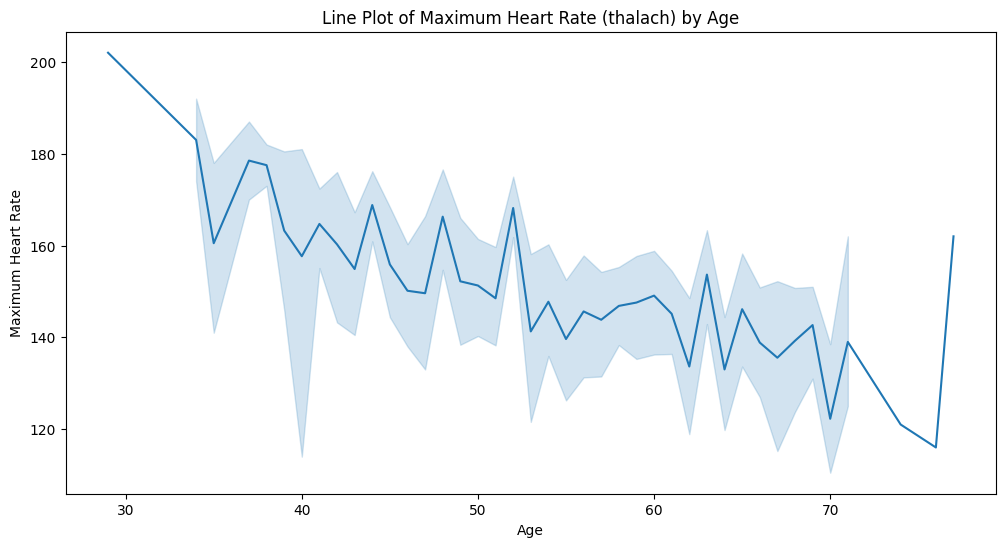

In [130]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='thalach', data=df)
plt.title('Line Plot of Maximum Heart Rate (thalach) by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

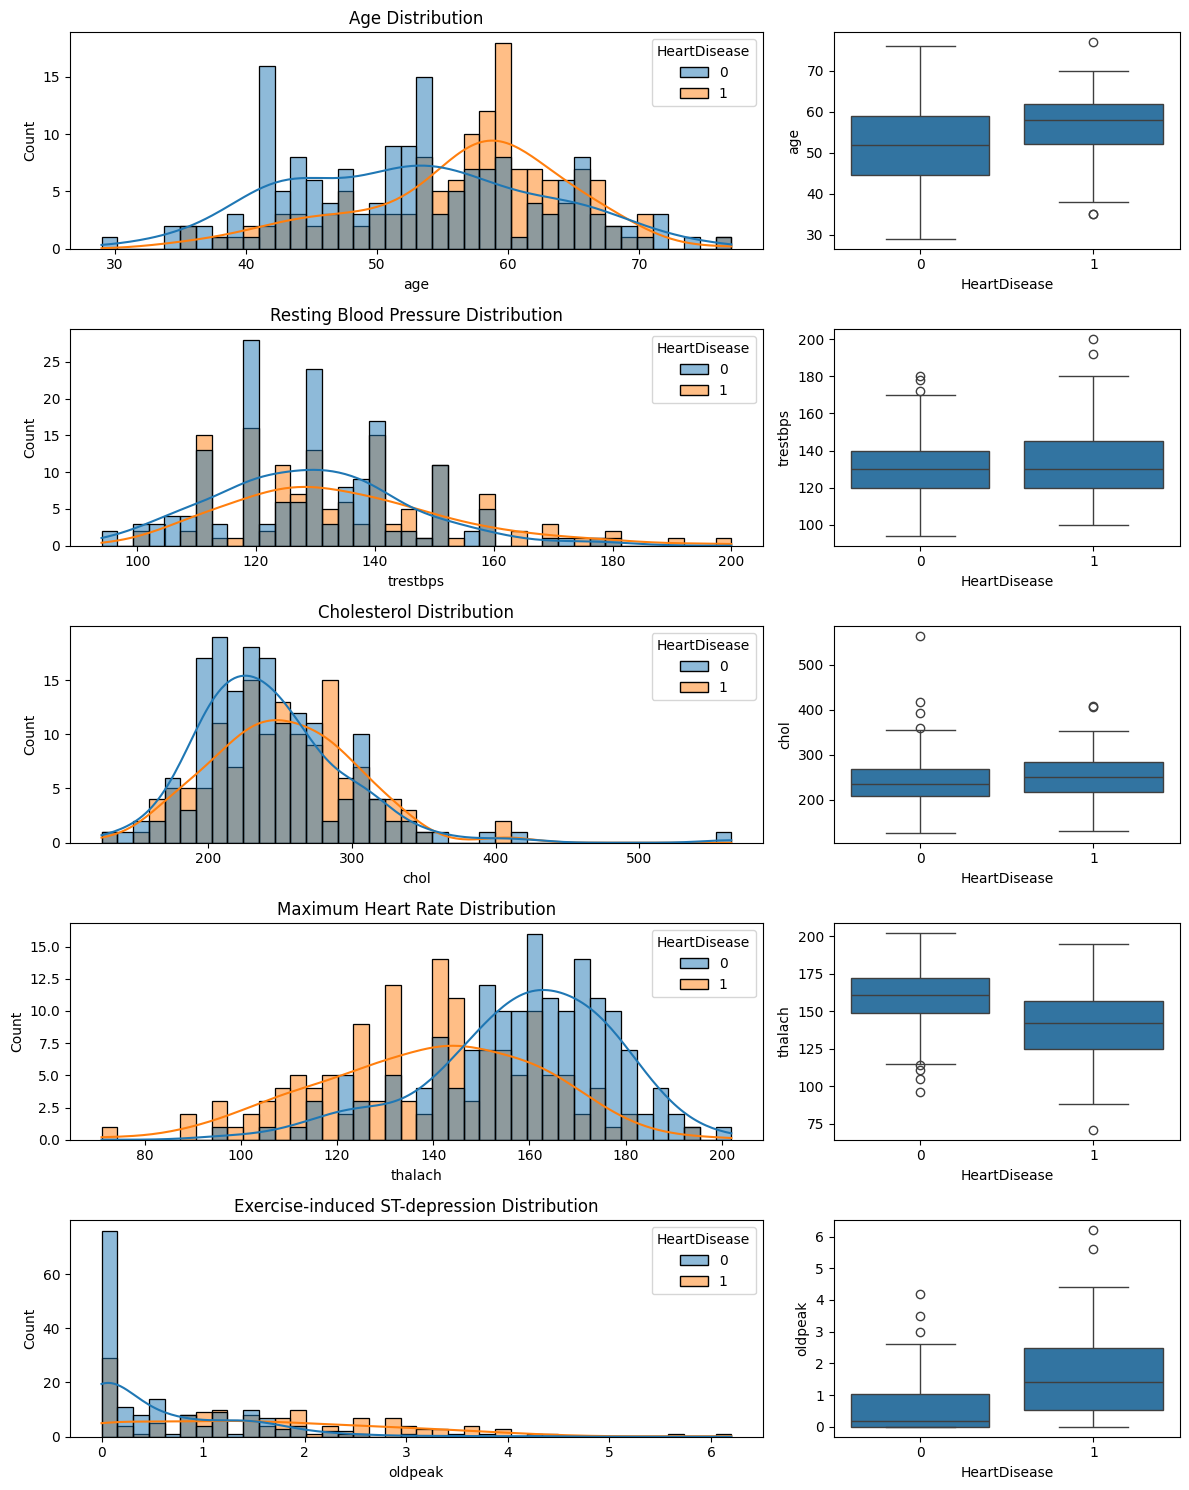

In [131]:
def num_plot_grid(df, attributes, titles, figsize=(12, 15)):

    fig, axes = plt.subplots(len(attributes), 2, figsize=figsize,
                             gridspec_kw={'width_ratios': [2, 1]})
    
    for i, attr in enumerate(attributes):

        sns.histplot(data=df, x=attr, kde=True, hue='HeartDisease', 
                     bins=40,  ax=axes[i,0]) 

        axes[i,0].set_title(titles[i])

        sns.boxplot(data=df, x='HeartDisease', y=attr, ax=axes[i,1])

    plt.tight_layout()
    plt.show()

attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
titles = ['Age Distribution', 'Resting Blood Pressure Distribution', 
          'Cholesterol Distribution', 'Maximum Heart Rate Distribution', 'Exercise-induced ST-depression Distribution']

num_plot_grid(df, attributes, titles)

Older patient are more likely to have heart disease.

Lower heart rate is assoicated with heart disease (negative association, corr -0.42).

Increased ST-depression level is associated with heart disease

<Figure size 640x480 with 0 Axes>

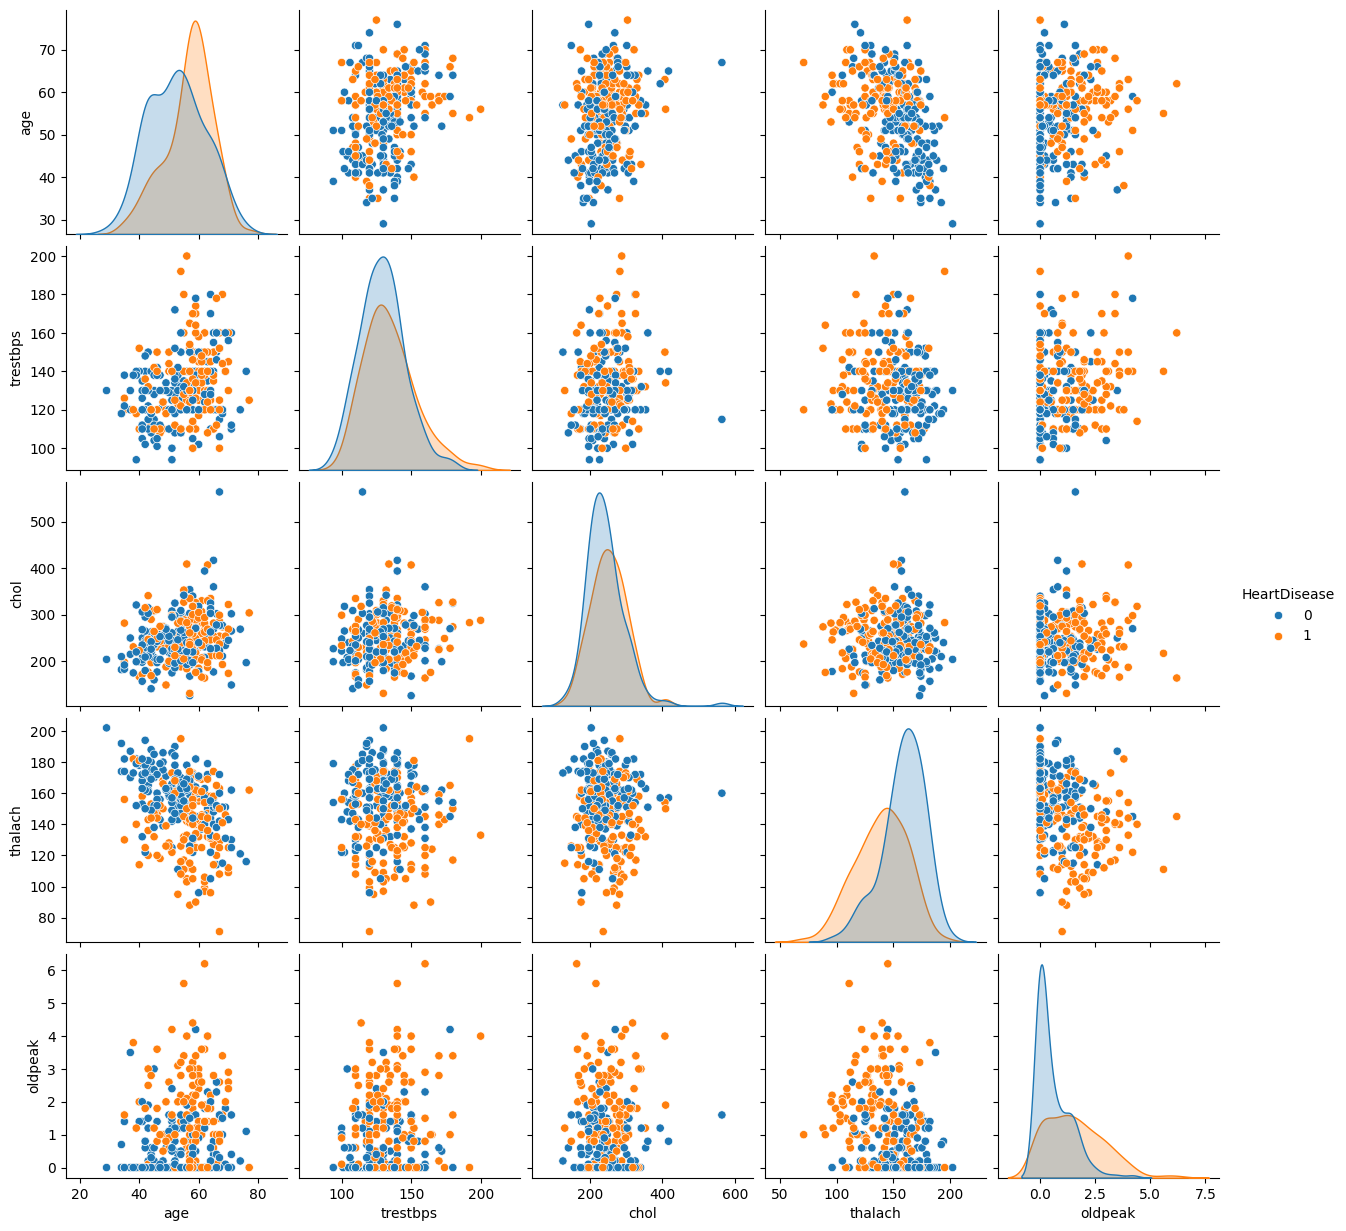

In [132]:
#create pairplot
plt.figure()
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak', 'HeartDisease']], hue='HeartDisease'
           #markers=['o','D'], plot_kws=dict(s=25, alpha=0.75, ci=None)
            )

plt.show()

In [133]:
X = df.drop(columns=['HeartDisease'],axis=1)
Y = df['HeartDisease']

In [134]:
print(X.shape , Y.shape)

(301, 13) (301,)


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [136]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=26,stratify=Y)

In [137]:
scaler = StandardScaler()


In [138]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [139]:
X_train_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,1.421462,-1.445073,0.859781,-1.462644,-0.432094,-0.423999,-1.024123,-0.344657,-0.722315,-0.699168,-1.000244,1.666547,-0.902396
1,0.978902,-1.445073,0.859781,-0.418096,-0.935666,-0.423999,-1.024123,-0.610589,1.384437,-0.962927,0.640781,-0.674422,-0.902396
2,1.421462,0.692007,0.859781,-0.650217,-0.315885,-0.423999,0.985838,-0.920843,1.384437,1.322977,0.640781,1.666547,1.163033
3,-1.676462,-1.445073,-0.160298,0.394331,-0.490199,-0.423999,-1.024123,0.098564,-0.722315,-0.962927,0.640781,-0.674422,-0.902396
4,0.425701,0.692007,-0.160298,-1.114461,-0.296517,-0.423999,0.985838,0.674750,-0.722315,1.235058,0.640781,0.496062,1.163033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.315061,0.692007,-0.160298,-0.185974,-0.315885,-0.423999,0.985838,0.009920,-0.722315,-0.611249,0.640781,0.496062,1.163033
206,-1.565821,0.692007,0.859781,-1.230522,-1.516711,-0.423999,0.985838,-1.585674,1.384437,0.795461,0.640781,-0.674422,1.163033
207,0.868262,-1.445073,0.859781,-0.418096,-0.703248,-0.423999,-1.024123,0.586106,-0.722315,-0.962927,-1.000244,-0.674422,-0.902396
208,-0.570060,-1.445073,-1.180377,0.162209,0.497577,-0.423999,-1.024123,0.541784,-0.722315,-0.962927,0.640781,-0.674422,-0.902396


In [140]:
X_test_scaled


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hal
0,0.315061,0.692007,-0.160298,1.090696,-2.310805,2.358495,-1.024123,1.029327,-0.722315,-0.787088,-1.000244,0.496062,1.163033
1,-1.455181,0.692007,-0.160298,-1.114461,0.090846,-0.423999,-1.024123,1.295259,-0.722315,-0.962927,-1.000244,-0.674422,-0.902396
2,1.089542,0.692007,-2.200456,2.251305,-0.354622,-0.423999,0.985838,0.231530,-0.722315,-0.435410,0.640781,-0.674422,1.163033
3,0.093781,0.692007,0.859781,0.510392,-0.548303,-0.423999,-1.024123,-1.718640,1.384437,3.960559,2.281807,-0.674422,1.163033
4,-1.123261,0.692007,0.859781,-1.230522,-0.935666,-0.423999,0.985838,1.206615,-0.722315,-0.962927,-1.000244,0.496062,-0.902396
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.536341,0.692007,-1.180377,0.510392,-0.470831,-0.423999,-1.024123,0.630428,1.384437,-0.962927,-1.000244,-0.674422,-0.902396
87,-0.570060,0.692007,-0.160298,-0.650217,-1.109980,-0.423999,-1.024123,-0.477623,-0.722315,0.795461,0.640781,2.837031,1.163033
88,-0.016859,0.692007,0.859781,-1.230522,-0.761353,-0.423999,0.985838,-1.851606,1.384437,-0.962927,0.640781,0.496062,-0.902396
89,0.315061,0.692007,0.859781,1.206757,0.555682,-0.423999,-1.024123,-2.738047,1.384437,0.092106,0.640781,0.496062,1.163033


In [141]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [142]:
# Acc. on training data
X_train_pred = model.predict(X_train_scaled)
train_pred = accuracy_score(X_train_pred, y_train)

print("Accuracy on training Data => ",train_pred)

# Acc. on Test Data
X_test_pred = model.predict(X_test_scaled)
test_pred = accuracy_score(X_test_pred, y_test)
print("Accuracy on test Data => ",test_pred)

Accuracy on training Data =>  0.8761904761904762
Accuracy on test Data =>  0.8021978021978022


In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(train_pred, y_train)
print("Accuracy on training Data => ", train_accuracy)

# Evaluate the best model on the test data
test_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(test_pred, y_test)
print("Accuracy on test Data => ", test_accuracy)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Accuracy on training Data =>  0.8809523809523809
Accuracy on test Data =>  0.8021978021978022


In [145]:
from sklearn.svm import SVC

In [146]:
model2 = SVC()
model2.fit(X_train_scaled, y_train)

SVC()

In [147]:
# Acc. on training data
X_train_pred2 = model2.predict(X_train_scaled)
train_pred2 = accuracy_score(X_train_pred2, y_train)

print("Accuracy on training Data => ",train_pred2)

# Acc. on Test Data
X_test_pred2 = model2.predict(X_test_scaled)
test_pred2 = accuracy_score(X_test_pred2, y_test)
print("Accuracy on test Data => ",test_pred2)

Accuracy on training Data =>  0.9238095238095239
Accuracy on test Data =>  0.7912087912087912


In [148]:
from sklearn.metrics import classification_report

In [149]:
# Generate a classification report
report = classification_report(y_test, X_test_pred2)

# Print the classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        49
           1       0.81      0.71      0.76        42

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



The model shows reasonably good performance with an overall accuracy of 80% on the test set.

Class 0 has higher precision and recall compared to class 1, indicating better performance in predicting instances of class 0.

The macro-average and weighted average metrics provide a balanced summary, considering the performance across both classes.

It's important to further investigate and possibly fine-tune the model based on the specific goals and requirements of the classification problem.

In [150]:
# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_svc.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_svc = grid_search_svc.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_svc)

# Get the best model from the grid search
best_model_svc = grid_search_svc.best_estimator_

# Evaluate the best model on the training data
train_pred_svc = best_model_svc.predict(X_train_scaled)
train_accuracy_svc = accuracy_score(train_pred_svc, y_train)
print("Accuracy on training Data => ", train_accuracy_svc)

# Evaluate the best model on the test data
test_pred_svc = best_model_svc.predict(X_test_scaled)
test_accuracy_svc = accuracy_score(test_pred_svc, y_test)
print("Accuracy on test Data => ", test_accuracy_svc)

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy on training Data =>  0.9238095238095239
Accuracy on test Data =>  0.7912087912087912


In [151]:
from sklearn.ensemble import RandomForestClassifier

In [152]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_rf)

# Get the best model from the grid search
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model on the training data
train_pred_rf = best_model_rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(train_pred_rf, y_train)
print("Accuracy on training Data => ", train_accuracy_rf)

# Evaluate the best model on the test data
test_pred_rf = best_model_rf.predict(X_test_scaled)
test_accuracy_rf = accuracy_score(test_pred_rf, y_test)
print("Accuracy on test Data => ", test_accuracy_rf)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on training Data =>  0.9095238095238095
Accuracy on test Data =>  0.8351648351648352


In [153]:
from xgboost import XGBClassifier

In [154]:
# Create an XGBoost model
xgb_model = XGBClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create a GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data with hyperparameter tuning
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params_xgb = grid_search_xgb.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params_xgb)

# Get the best model from the grid search
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the best model on the training data
train_pred_xgb = best_model_xgb.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(train_pred_xgb, y_train)
print("Accuracy on training Data => ", train_accuracy_xgb)

# Evaluate the best model on the test data
test_pred_xgb = best_model_xgb.predict(X_test_scaled)
test_accuracy_xgb = accuracy_score(test_pred_xgb, y_test)
print("Accuracy on test Data => ", test_accuracy_xgb)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Accuracy on training Data =>  0.919047619047619
Accuracy on test Data =>  0.8021978021978022


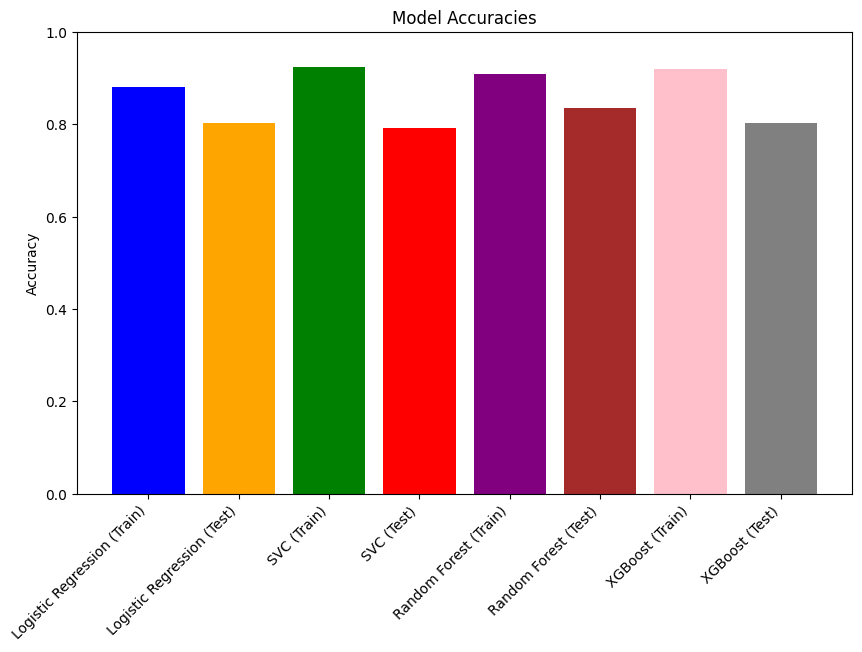

In [165]:
# Accuracy values for each model
accuracies = [train_accuracy, test_accuracy, train_accuracy_svc, test_accuracy_svc,
              train_accuracy_rf, test_accuracy_rf, train_accuracy_xgb, test_accuracy_xgb]

# Model names for the x-axis
models = ['Logistic Regression (Train)', 'Logistic Regression (Test)',
          'SVC (Train)', 'SVC (Test)',
          'Random Forest (Train)', 'Random Forest (Test)',
          'XGBoost (Train)', 'XGBoost (Test)']

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray'])
plt.ylim([0, 1.0])  # Set y-axis limits between 0 and 1
plt.title('Model Accuracies')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [168]:
import pickle

In [169]:
# Dump the model into a pickle file
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_model_rf, f)